In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
sns.set()
import re
import difflib
from PIL import Image
import requests
from io import BytesIO

In [240]:
movie_dataframe = pd.read_json('/content/cleaned_movie_dataframe.json')
movie_dataframe.head()

,Title,Movie Url,Year,Certificate,Genre,Runtime,Metascore,Rating,Description,Director,Stars,Votes,Gross,Movie Poster
0,The Godfather,https://www.imdb.com/title/tt0068646/,1972,M18,"[Crime, Drama]",175.0,100.0,9.2,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane K...",1894039.0,1.349700e+08,https://m.media-amazon.com/images/M/MV5BM2MyNj...
1,The Godfather Part II,https://www.imdb.com/title/tt0071562/,1974,PG,"[Crime, Drama]",202.0,90.0,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,"[Al Pacino, Robert De Niro, Robert Duvall, Dia...",1291787.0,5.730000e+07,https://m.media-amazon.com/images/M/MV5BMWMwMG...
2,Ordinary People,https://www.imdb.com/title/tt0081283/,1980,PG,[Drama],124.0,86.0,7.7,The accidental death of the older son of an af...,Robert Redford,"[Donald Sutherland, Mary Tyler Moore, Judd Hir...",54024.0,5.480000e+07,https://m.media-amazon.com/images/M/MV5BNWU3MD...
3,Lawrence of Arabia,https://www.imdb.com/title/tt0056172/,1962,PG,"[Adventure, Biography, Drama]",218.0,100.0,8.3,"The story of T.E. Lawrence, the English office...",David Lean,"[Peter O'Toole, Alec Guinness, Anthony Quinn, ...",299317.0,4.482000e+07,https://m.media-amazon.com/images/M/MV5BYWY5Zj...
4,Straw Dogs,https://www.imdb.com/title/tt0067800/,1971,M18,"[Crime, Drama, Thriller]",113.0,73.0,7.4,A young American and his English wife come to ...,Sam Peckinpah,"[Dustin Hoffman, Susan George, Peter Vaughan, ...",61994.0,6.527458e+07,https://m.media-amazon.com/images/M/MV5BNDBiZG...


In [241]:
#shape of the dataset
movie_dataframe.shape

(2951, 14)

In [242]:
#information about dataset
movie_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2951 entries, 0 to 2950
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         2951 non-null   object 
 1   Movie Url     2951 non-null   object 
 2   Year          2951 non-null   int64  
 3   Certificate   2951 non-null   object 
 4   Genre         2951 non-null   object 
 5   Runtime       2951 non-null   float64
 6   Metascore     2951 non-null   float64
 7   Rating        2951 non-null   float64
 8   Description   2951 non-null   object 
 9   Director      2951 non-null   object 
 10  Stars         2951 non-null   object 
 11  Votes         2951 non-null   float64
 12  Gross         2951 non-null   float64
 13  Movie Poster  2951 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 322.9+ KB


In [243]:
#columns in the dataset
movie_dataframe.columns

Index(['Title', 'Movie Url', 'Year', 'Certificate', 'Genre', 'Runtime',
       'Metascore', 'Rating', 'Description', 'Director', 'Stars', 'Votes',
       'Gross', 'Movie Poster'],
      dtype='object')

In [244]:
#statistics for numerical value
movie_dataframe.describe()

,Year,Runtime,Metascore,Rating,Votes,Gross
count,2951.000000,2951.000000,2951.000000,2951.000000,2.951000e+03,2.951000e+03
mean,1999.937987,113.369831,60.532885,6.851372,2.090733e+05,6.527458e+07
std,15.518864,22.792740,17.808110,0.971850,2.561262e+05,7.678585e+07
min,1921.000000,6.000000,1.000000,1.400000,1.803000e+03,0.000000e+00
25%,1995.000000,98.000000,48.000000,6.300000,7.039700e+04,1.558500e+07
50%,2005.000000,109.000000,60.532885,6.900000,1.250105e+05,4.570000e+07
75%,2011.000000,124.000000,73.000000,7.500000,2.433860e+05,8.060500e+07
max,2023.000000,321.000000,100.000000,9.300000,2.724729e+06,9.366600e+08


In [245]:
#statistics for object value
movie_dataframe.describe(include = 'object')

,Title,Movie Url,Certificate,Genre,Description,Director,Stars,Movie Poster
count,2951,2951,2951,2951,2951,2951,2951,2951
unique,2816,2852,13,291,2852,1272,2833,2852
top,The Parent Trap,https://www.imdb.com/title/tt0068646/,PG,"[Comedy, Drama, Romance]",The aging patriarch of an organized crime dyna...,Steven Spielberg,"[Sylvester Stallone, Talia Shire, Burt Young, ...",https://m.media-amazon.com/images/M/MV5BM2MyNj...
freq,3,2,1307,147,2,28,5,2


In [246]:
#data types
movie_dataframe.dtypes

Title            object
Movie Url        object
Year              int64
Certificate      object
Genre            object
Runtime         float64
Metascore       float64
Rating          float64
Description      object
Director         object
Stars            object
Votes           float64
Gross           float64
Movie Poster     object
dtype: object

In [247]:
#checking for missing values
movie_dataframe.isnull().sum()

Title           0
Movie Url       0
Year            0
Certificate     0
Genre           0
Runtime         0
Metascore       0
Rating          0
Description     0
Director        0
Stars           0
Votes           0
Gross           0
Movie Poster    0
dtype: int64

**Data Visualization**

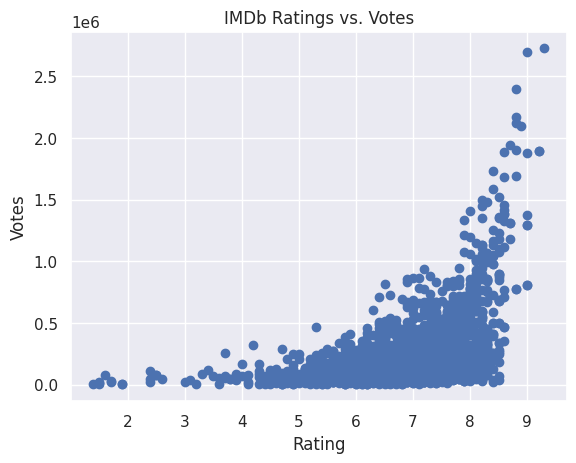

In [248]:
# Create scatter plot of Votes versus Rating
plt.scatter(movie_dataframe['Rating'], movie_dataframe['Votes'])
plt.title('IMDb Ratings vs. Votes')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.show()

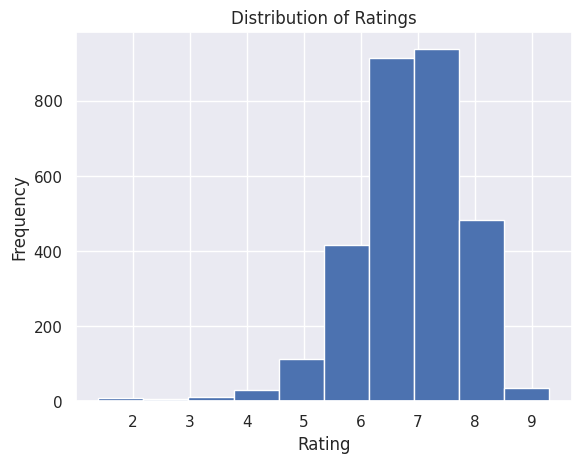

In [249]:
plt.hist(movie_dataframe['Rating'], bins=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

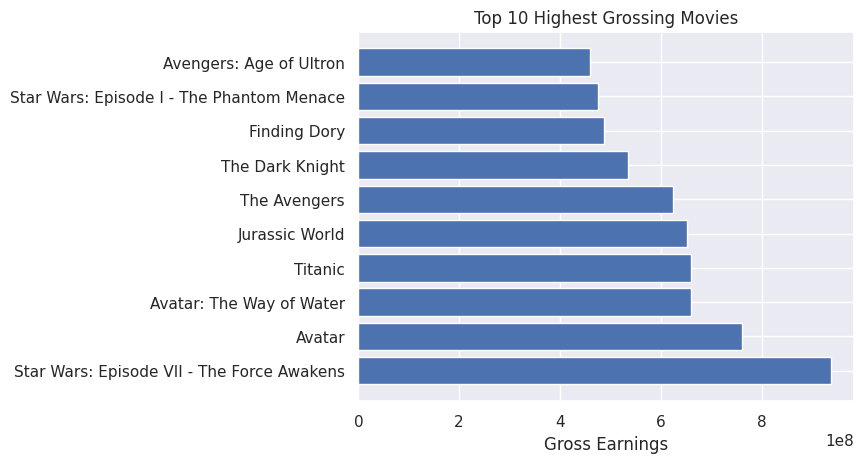

In [250]:
top_grossing = movie_dataframe.sort_values('Gross', ascending=False).head(10)
plt.barh(top_grossing['Title'], top_grossing['Gross'])
plt.xlabel('Gross Earnings')
plt.title('Top 10 Highest Grossing Movies')
plt.show()


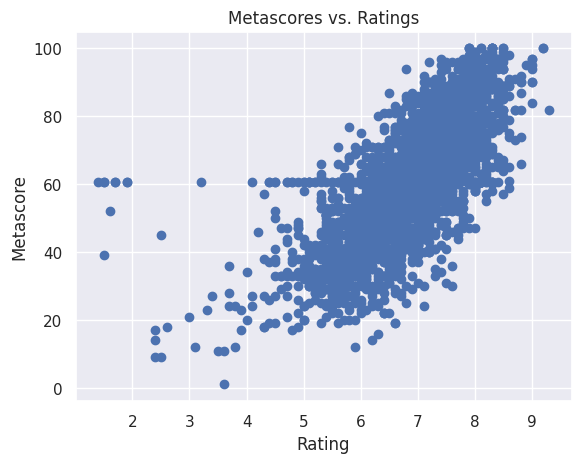

In [251]:
plt.scatter(movie_dataframe['Rating'], movie_dataframe['Metascore'])
plt.xlabel('Rating')
plt.ylabel('Metascore')
plt.title('Metascores vs. Ratings')
plt.show()

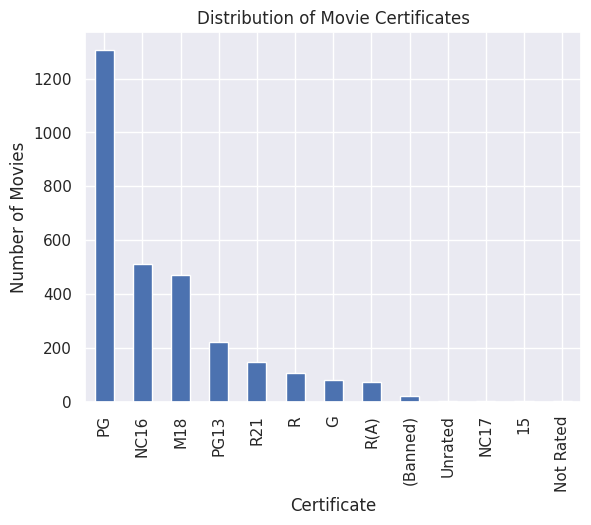

In [252]:
movie_dataframe['Certificate'].value_counts().plot(kind='bar')
plt.xlabel('Certificate')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Certificates')
plt.show()


**Feature Selection**

In [253]:
selected_columns = ['Genre','Director','Stars','Rating','Year','Description']
selected_features = movie_dataframe[selected_columns]
selected_features

,Genre,Director,Stars,Rating,Year,Description
0,"[Crime, Drama]",Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane K...",9.2,1972,The aging patriarch of an organized crime dyna...
1,"[Crime, Drama]",Francis Ford Coppola,"[Al Pacino, Robert De Niro, Robert Duvall, Dia...",9.0,1974,The early life and career of Vito Corleone in ...
2,[Drama],Robert Redford,"[Donald Sutherland, Mary Tyler Moore, Judd Hir...",7.7,1980,The accidental death of the older son of an af...
3,"[Adventure, Biography, Drama]",David Lean,"[Peter O'Toole, Alec Guinness, Anthony Quinn, ...",8.3,1962,"The story of T.E. Lawrence, the English office..."
4,"[Crime, Drama, Thriller]",Sam Peckinpah,"[Dustin Hoffman, Susan George, Peter Vaughan, ...",7.4,1971,A young American and his English wife come to ...
...,...,...,...,...,...,...
2946,"[Biography, Drama, History]",F. Gary Gray,"[O'Shea Jackson Jr., Corey Hawkins, Jason Mitc...",7.8,2015,The rap group NWA emerges from the mean street...
2947,"[Comedy, Drama, Romance]",Josh Lawson,"[Bojana Novakovic, Josh Lawson, Damon Herriman...",7.0,2014,The secret lives of five suburban couples livi...
2948,"[Comedy, Drama]",Andy Hamilton,"[Guy Jenkin, Rosamund Pike, David Tennant, Bil...",6.9,2014,A family of five heads to Granddad's big 75th-...
2949,"[Horror, Thriller]",Gil Kenan,"[Sam Rockwell, Rosemarie DeWitt, Kennedi Cleme...",4.9,2015,A family whose suburban home is haunted by evi...


**Remove list from Genre and Stars columns**

In [254]:
def join_strings(df, column_name):
    df[column_name] = df[column_name].apply(lambda x: ' '.join(x))
    return df
join_strings(selected_features,'Genre')
join_strings(selected_features,'Stars')

<ipython-input-254-73c7d4f18c9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].apply(lambda x: ' '.join(x))


,Genre,Director,Stars,Rating,Year,Description
0,Crime Drama,Francis Ford Coppola,Marlon Brando Al Pacino James Caan Diane Keaton,9.2,1972,The aging patriarch of an organized crime dyna...
1,Crime Drama,Francis Ford Coppola,Al Pacino Robert De Niro Robert Duvall Diane K...,9.0,1974,The early life and career of Vito Corleone in ...
2,Drama,Robert Redford,Donald Sutherland Mary Tyler Moore Judd Hirsch...,7.7,1980,The accidental death of the older son of an af...
3,Adventure Biography Drama,David Lean,Peter O'Toole Alec Guinness Anthony Quinn Jack...,8.3,1962,"The story of T.E. Lawrence, the English office..."
4,Crime Drama Thriller,Sam Peckinpah,Dustin Hoffman Susan George Peter Vaughan T.P....,7.4,1971,A young American and his English wife come to ...
...,...,...,...,...,...,...
2946,Biography Drama History,F. Gary Gray,O'Shea Jackson Jr. Corey Hawkins Jason Mitchel...,7.8,2015,The rap group NWA emerges from the mean street...
2947,Comedy Drama Romance,Josh Lawson,Bojana Novakovic Josh Lawson Damon Herriman Ka...,7.0,2014,The secret lives of five suburban couples livi...
2948,Comedy Drama,Andy Hamilton,Guy Jenkin Rosamund Pike David Tennant Billy C...,6.9,2014,A family of five heads to Granddad's big 75th-...
2949,Horror Thriller,Gil Kenan,Sam Rockwell Rosemarie DeWitt Kennedi Clements...,4.9,2015,A family whose suburban home is haunted by evi...


**Combine the following columns:**

**1. Genre**

**2. Director**

**3. Stars**

**4. Rating**

**5. Year**

**6. Description**

In [255]:
def combine_features(movies):
    # Initialize an empty string to store the combined features
    combined_features = ""

    # Iterate through each feature and concatenate its values with a space separator
    for column in movies.columns:
        # Fill any missing values with an empty string and convert to string type
        combined_features += movies[column].fillna('').astype(str) + ' '

    # Strip any leading/trailing whitespace and return the combined string as a pandas Series
    return combined_features.str.strip()

# Call the function on the new_movies dataframe
combined_features = combine_features(selected_features)
combined_features.head()

0    Crime  Drama Francis Ford Coppola Marlon Brand...
1    Crime  Drama Francis Ford Coppola Al Pacino Ro...
2    Drama Robert Redford Donald Sutherland Mary Ty...
3    Adventure  Biography  Drama David Lean Peter O...
4    Crime  Drama  Thriller Sam Peckinpah Dustin Ho...
Name: Genre, dtype: object

**Compute TfidfVectorizer**

In [256]:
def get_feature_vector(data):
    """
    Convert a list of text data into a sparse matrix of TF-IDF vectors.

    Args:
    data (list): A list of strings to be vectorized.

    Returns:
    scipy.sparse.csr_matrix: A sparse matrix of shape (n_samples, n_features) representing the TF-IDF vectors of the input data.

    """

    # Define a TfidfVectorizer object to convert text to TF-IDF vectors
    vectorizer = TfidfVectorizer()

    # Fit the vectorizer on the input data and transform it into a sparse matrix
    feature_vector = vectorizer.fit_transform(data)

    return feature_vector

# Call the function on the combined features
feature_vector = get_feature_vector(combined_features)
print(feature_vector)

  (0, 13389)	0.13608248170203488
  (0, 15874)	0.21814997051221338
  (0, 11892)	0.20943176238881292
  (0, 14471)	0.04481242874628221
  (0, 4664)	0.1903817705894992
  (0, 2774)	0.23043759472576786
  (0, 6693)	0.12615875148414868
  (0, 3171)	0.17877518650046711
  (0, 14623)	0.2391558028491683
  (0, 2759)	0.1283916604460046
  (0, 15864)	0.13412664116439368
  (0, 10031)	0.10267699171471731
  (0, 11158)	0.22367522714000862
  (0, 7080)	0.05593792733953973
  (0, 4416)	0.23043759472576786
  (0, 10417)	0.21814997051221338
  (0, 683)	0.07071709457013452
  (0, 10275)	0.09758106575773547
  (0, 10702)	0.21814997051221338
  (0, 433)	0.18166356246609874
  (0, 14311)	0.0419677666480191
  (0, 95)	0.19714413817525844
  (0, 7845)	0.1761383058383035
  (0, 3951)	0.16742009771490307
  (0, 2216)	0.2058623462986589
  :	:
  (2950, 3165)	0.22784921451448745
  (2950, 1025)	0.20970392878107363
  (2950, 1878)	0.22784921451448745
  (2950, 13163)	0.16867279796091056
  (2950, 11316)	0.17578918542526414
  (2950, 14094)

**Calculate simiarity matrix based on feature vector**

In [257]:
def get_cosine_similarity_matrix(feature_vector):
    similarity_matrix = cosine_similarity(feature_vector)
    return similarity_matrix
similarity = get_cosine_similarity_matrix(feature_vector)
similarity[0]

array([1.        , 0.32039446, 0.05954874, ..., 0.01605111, 0.05101463,
       0.02107149])

In [258]:
movie_name = input('Enter name of the movie: ')

Enter name of the movie: god father


In [259]:
movie_titles = movie_dataframe['Title'].tolist()


In [260]:
#close match

find_close_match = difflib.get_close_matches(movie_name,movie_titles)
find_close_match

['The Godfather', 'The Godfather', 'Would You Rather']

In [261]:
close_match = find_close_match[0]
close_match

'The Godfather'

In [262]:
movie_location = movie_dataframe[movie_dataframe.Title == close_match]
movie_location

,Title,Movie Url,Year,Certificate,Genre,Runtime,Metascore,Rating,Description,Director,Stars,Votes,Gross,Movie Poster
0,The Godfather,https://www.imdb.com/title/tt0068646/,1972,M18,"[Crime, Drama]",175.0,100.0,9.2,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane K...",1894039.0,134970000.0,https://m.media-amazon.com/images/M/MV5BM2MyNj...
99,The Godfather,https://www.imdb.com/title/tt0068646/,1972,M18,"[Crime, Drama]",175.0,100.0,9.2,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane K...",1894039.0,134970000.0,https://m.media-amazon.com/images/M/MV5BM2MyNj...


In [263]:
movie_index = movie_location.index[0]
movie_index

0

In [264]:
similarity_score = list(enumerate(similarity[movie_index]))


In [265]:
sort_similar_movies = sorted(similarity_score,key = lambda x:x[1],reverse = True)
sort_similar_movies

[(0, 1.0),
 (99, 1.0),
 (1, 0.32039446164109175),
 (100, 0.32039446164109175),
 (413, 0.31537750235415063),
 (40, 0.17409385752726483),
 (139, 0.17409385752726483),
 (290, 0.16164721386138178),
 (1684, 0.13952399404688168),
 (985, 0.13514698892610694),
 (675, 0.13438618583381423),
 (2524, 0.12790467155926513),
 (60, 0.12112338434851291),
 (159, 0.12112338434851291),
 (84, 0.12077496277045416),
 (183, 0.12077496277045416),
 (786, 0.11996253809181809),
 (674, 0.11962292298554493),
 (2937, 0.1172459954777962),
 (2779, 0.11133860960819995),
 (1160, 0.11002031294640374),
 (755, 0.10880480650941622),
 (508, 0.10704941523833801),
 (705, 0.10399279668596317),
 (90, 0.10262913936040814),
 (189, 0.10262913936040814),
 (800, 0.09997795125045923),
 (2345, 0.0992091017639814),
 (1707, 0.0979082557966115),
 (926, 0.09778088984496293),
 (641, 0.09736204129986913),
 (19, 0.09702253379231765),
 (118, 0.09702253379231765),
 (930, 0.09635335588673913),
 (1597, 0.09518218568626652),
 (1964, 0.092652476839

In [287]:
def get_movie_posters(similar_movies,movie_dataframe):
    movie_posters = []
    movie_titles = []
    for movie in similar_movies[:12]:
        index = movie[0]
        movie_title = movie_dataframe.iloc[index].Title
        movie_poster = movie_dataframe.iloc[index]['Movie Poster']
        movie_posters.append(movie_poster)
        movie_titles.append(movie_title)
      
    return movie_posters,movie_titles



In [294]:
def show_movie_posters(movie_posters, movie_titles):
    plt.figure(figsize=(10,10))
    for index, url in enumerate(movie_posters):
        response = requests.get(url).content
        img = Image.open(BytesIO(response))
        plt.subplot(4,3,index+1)
        plt.axis('Off')
        plt.imshow(np.array(img))
        plt.title(f'{movie_titles[index]}')
    plt.show()



In [269]:
title_2 = [ re.sub(r'\W+','',title.lower()) for title in movie_dataframe['Title']]
movie_dataframe['Title2'] = title_2
movie_dataframe[['Title','Title2']].head()

,Title,Title2
0,The Godfather,thegodfather
1,The Godfather Part II,thegodfatherpartii
2,Ordinary People,ordinarypeople
3,Lawrence of Arabia,lawrenceofarabia
4,Straw Dogs,strawdogs


Enter Movie Name: god fella

Movie Name: god fella

Close Matches
1. goodfellas
2. godzilla
3. godzilla

Choosen Movie name: goodfellas
Movie index: 415

 Movie Suggested For You:


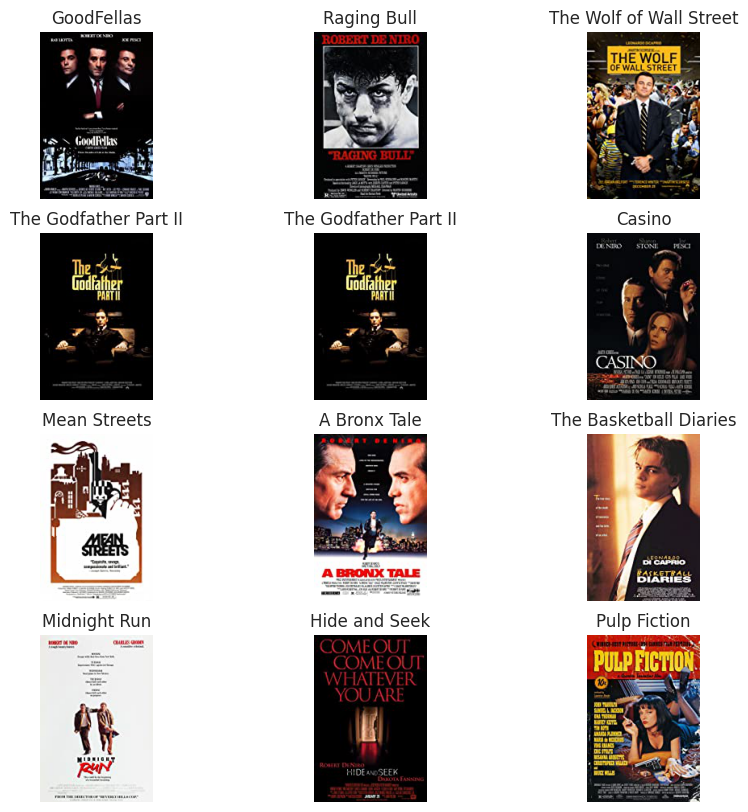

In [299]:
def recommend_movie():
  movie_name = input('Enter Movie Name: ').lower()
  print(f'\nMovie Name: {movie_name}')
  movie_name = re.sub(r'\W+', '', movie_name)
  
  all_movie_Title = movie_dataframe['Title2'].tolist()
  get_close_match = difflib.get_close_matches(movie_name,all_movie_Title)
  
  if len(get_close_match) == 0:
    print(f'No close Match Found')
  else:
    print(f'\nClose Matches')
    close_match = get_close_match[0]
    for index,match in enumerate(get_close_match,start = 1):
      print(f'{index}. {match}')
    print(f'\nChoosen Movie name: {close_match}')


    movie_index = movie_dataframe[movie_dataframe.Title2 == close_match].index[0]
    print(f'Movie index: {movie_index}')

    similarity_score = list(enumerate(similarity[movie_index]))
    sorted_similarity_score = sorted(similarity_score,key = lambda x: x[1],reverse = True)

    print('\n Movie Suggested For You:')
    movie_posters,movie_titles = get_movie_posters(sorted_similarity_score,movie_dataframe)
    show_movie_posters(movie_posters,movie_titles)
      
recommend_movie()
  